In [1]:
# Add description here
#
# *Note:* You can open this file as a notebook (JupyterLab: right-click on it in the side bar -> Open With -> Notebook)

In [2]:
# Uncomment the next two lines to enable auto reloading for imported modules
# %load_ext autoreload
# %autoreload 2
# For more info, see:
# https://docs.ploomber.io/en/latest/user-guide/faq_index.html#auto-reloading-code-in-jupyter

In [3]:
# If this task has dependencies, list them them here
# (e.g. upstream = ['some_task']), otherwise leave as None.
upstream = ['clean']

# This is a placeholder, leave it as None
product = None

In [4]:
# Parameters
upstream = {
    "clean": {
        "nb": "C:\\Users\\marcu\\OneDrive\\Desktop\\Projects\\orlando-housing\\orlando-housing-1\\orlando-housing\\housing\\products\\clean.ipynb",
        "data": "C:\\Users\\marcu\\OneDrive\\Desktop\\Projects\\orlando-housing\\orlando-housing-1\\orlando-housing\\housing\\products\\clean.csv",
    }
}
product = {
    "nb": "C:\\Users\\marcu\\OneDrive\\Desktop\\Projects\\orlando-housing\\orlando-housing-1\\orlando-housing\\housing\\products\\fit.ipynb",
    "model": "C:\\Users\\marcu\\OneDrive\\Desktop\\Projects\\orlando-housing\\orlando-housing-1\\orlando-housing\\housing\\products\\model.pickle",
}


In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)


from scipy import stats
from scipy.stats import norm, skew #for some statistics

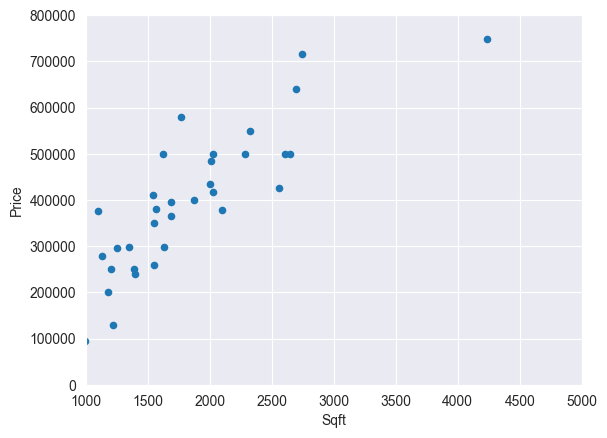

In [6]:

df = pd.read_csv(upstream['clean']['data'])
#Home prices based off sqft
var = 'Sqft'
data = pd.concat([df['Price'], df[var]], axis=1)
data.plot.scatter(x=var, y='Price', ylim=(0,800000),xlim=(1000,5000));


 mu = 566192.33 and sigma = 817729.30



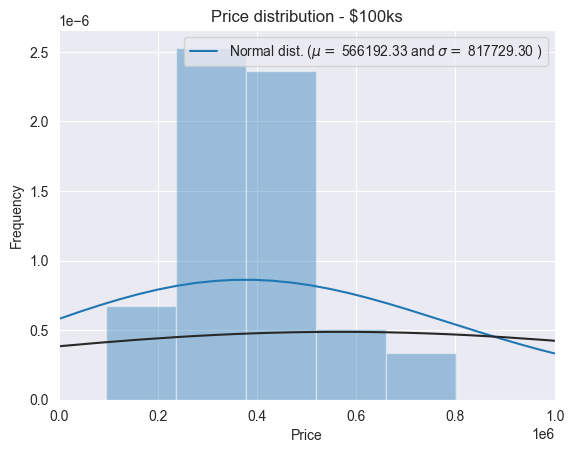

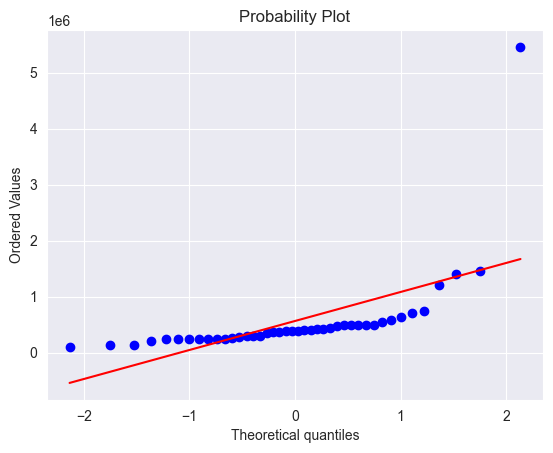

In [7]:
#Whats the frequency of houses in different price ranges
sns.distplot(df['Price'] , fit=norm);

#  the fitted parameters used by the function
(mu, sigma) = norm.fit(df['Price'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

# plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Price distribution - $100ks')
plt.xlim(0,1000000)

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df['Price'], plot=plt)
plt.show()

<AxesSubplot: >

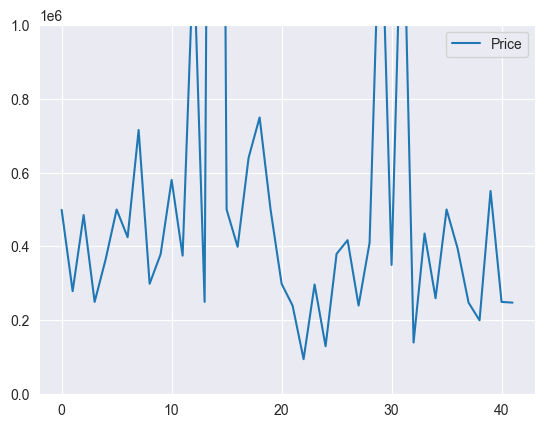

In [8]:
#Plot Line Graph of prices of homes
#Y = Price up to 2 million
df.plot.line(y='Price', use_index=True, ylim=(0,1000000))

In [9]:
X = df[['Beds','Baths','Sqft']]
y = df['Price']

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101) 

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
lm = LinearRegression()

In [14]:
lm.fit(X_train,y_train)

LinearRegression()

In [15]:
print(lm.intercept_)

-610153.2609820856


In [16]:
lm.coef_

array([-2.52303449e+05,  7.22886404e+05,  2.70227672e+02])

In [17]:
predictions = lm.predict(X_test)

In [18]:
predictions

array([ 636640.14730932,  627001.14779235, -170500.31963755,
       1416601.56147592, 3391569.34790604,  402982.40808666,
        728304.29898355,  649340.84787164, 1693436.11942596,
        750946.45237024, 1110768.28856568,  902601.1471261 ,
        488555.38330604, 1290526.66116157,  534313.05645453,
        768749.25305595,  709331.39095326])

In [19]:
y_test

1      279000.0
26     417000.0
20     299000.0
16     399000.0
29    1399000.0
3      249900.0
33     435000.0
38     199990.0
18     749000.0
30     349900.0
34     260000.0
35     500000.0
41     248000.0
7      714999.0
36     395000.0
24     129999.0
21     239900.0
Name: Price, dtype: float64

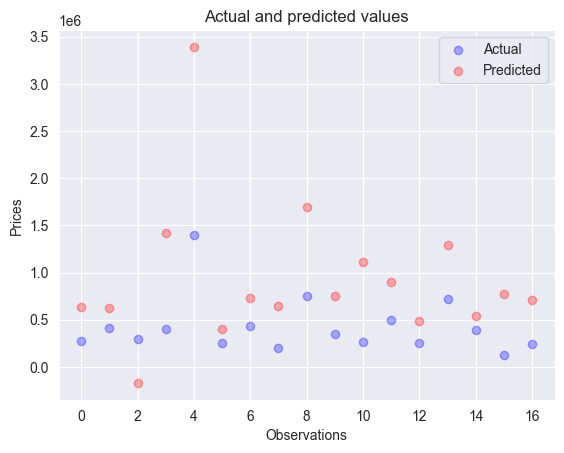

In [20]:
#scatter plot that shows atual prices of homes and predicted prices of home and how they compare
import matplotlib.pyplot as plt
_, ax = plt.subplots()

ax.scatter(x = range(0, y_test.size), y=y_test, c = 'blue', label = 'Actual', alpha = 0.3)
ax.scatter(x = range(0, predictions.size), y=predictions, c = 'red', label = 'Predicted', alpha = 0.3)

plt.title('Actual and predicted values')
plt.xlabel('Observations')
plt.ylabel('Prices')
plt.legend()
plt.show()